## Reading the Data

First, I need to import my required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Property df.csv',index_col=0)
df.head()

,displayPrice,dateSold,tenure,newBuild,address,propertyType,bedrooms,images,hasFloorPlan,detailUrl,latitude,longitude
0,"£720,050",17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
1,"£445,000",12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
2,"£643,756",9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
3,"£355,000",7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
4,"£220,000",23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displayPrice  2278 non-null   object 
 1   dateSold      2278 non-null   object 
 2   tenure        2278 non-null   object 
 3   newBuild      2278 non-null   bool   
 4   address       2278 non-null   object 
 5   propertyType  2278 non-null   object 
 6   bedrooms      1588 non-null   float64
 7   images        2278 non-null   object 
 8   hasFloorPlan  2278 non-null   bool   
 9   detailUrl     1588 non-null   object 
 10  latitude      2278 non-null   float64
 11  longitude     2278 non-null   float64
dtypes: bool(2), float64(3), object(7)
memory usage: 200.2+ KB


# Cleaning the Data

Data Cleaning involves several steps:
- Correcting the data types
- Removing unnecesary columns
- Handling missing values
 
To make certain columns usable I will need to correct data types and also handle missing values. I will also remove unnecessary columns that are unnecessary in the analysis. But first, I will rename the columns.

In [4]:
rename_columns = ['Price','Date_Sold','Tenure_Type','New_Build','Address','Property_Type','Num_Bedrooms','Image_URL','Floorplan','URL','Latitude','Longitude']

df.columns = rename_columns

### Correcting Data Types 

I need to manipulate 'Price' and convert into an integer by removing the £ sign and comma and converting data type into int

In [5]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('£','')
df['Price'] = df['Price'].astype(int)

In [6]:
type(df['Price'][0])

numpy.int64

I want to now seperate 'Address' to two variables that are more useful to me: 'Post_Code' & 'Road_Name'

In [7]:
df['Post_Code'] = df['Address'].apply(lambda x: x[-7:])
df['Road_Name'] = df['Address'].apply(lambda x: x.split(',')[1])

After looking at the data more closely, I identified that some of the 'Road_Name' were incorrectly populated, where the the flat number will be used instead of the road name. Looking at it more closely, I can adjust the road name by utilising the fact that the incorrect road name has a short string length.

In [8]:
df.loc[df['Address'].str.contains('flat',case=False)]

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name
76,352000,27 Sep 2021,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,311
77,305000,1 Jun 2017,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,311
87,220100,3 Sep 2021,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
88,205000,29 Oct 2019,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
89,130000,27 Feb 2014,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,257000,16 Sep 2015,Leasehold,False,"Flat 12, Salway House, 25, Thornhill Road, Lon...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56242,-0.01241,E10 5LZ,Salway House
2226,75500,10 Aug 2001,Leasehold,False,"Flat 12, Salway House, 25, Thornhill Road, Lon...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56242,-0.01241,E10 5LZ,Salway House
2249,387500,12 Jul 2019,Leasehold,False,"Flat 17, Plaza Heights, 12, Maud Road, London,...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.55676,-0.00703,E10 5QS,Plaza Heights
2250,380000,6 Jul 2016,Leasehold,False,"Flat 17, Plaza Heights, 12, Maud Road, London,...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.55676,-0.00703,E10 5QS,Plaza Heights


In [9]:
def incorrect_road_name(cols):
    road = cols[0]
    address = cols[1]

    if len(road) < 6:
        return address.split(',')[2]

    else:
        return road

In [10]:
df['Road_Name'] = df[['Road_Name','Address']].apply(incorrect_road_name,axis=1)

df.loc[df['Address'].str.contains('flat',case=False)].head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name
76,352000,27 Sep 2021,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,Church Road
77,305000,1 Jun 2017,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,Church Road
87,220100,3 Sep 2021,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
88,205000,29 Oct 2019,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
89,130000,27 Feb 2014,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions


I also want to analyse properties by year sold so I will convert 'Date_Sold' to 'Year_Sold'

In [11]:
df['Year_Sold'] = df['Date_Sold'].apply(lambda x: x[-4:])
df['Year_Sold'] =df['Year_Sold'].astype(int)

To make sure categorical features are the correct data type, I need to convert the features into object data types

In [12]:
categorical_columns = ['Tenure_Type','Property_Type','New_Build','Floorplan']
df[categorical_columns] = df[categorical_columns].astype(object)
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2006


Looking through the frequency of the values in categorical features. I removed duplicates of the same property as the duplicates will inflate the values of the graphs.

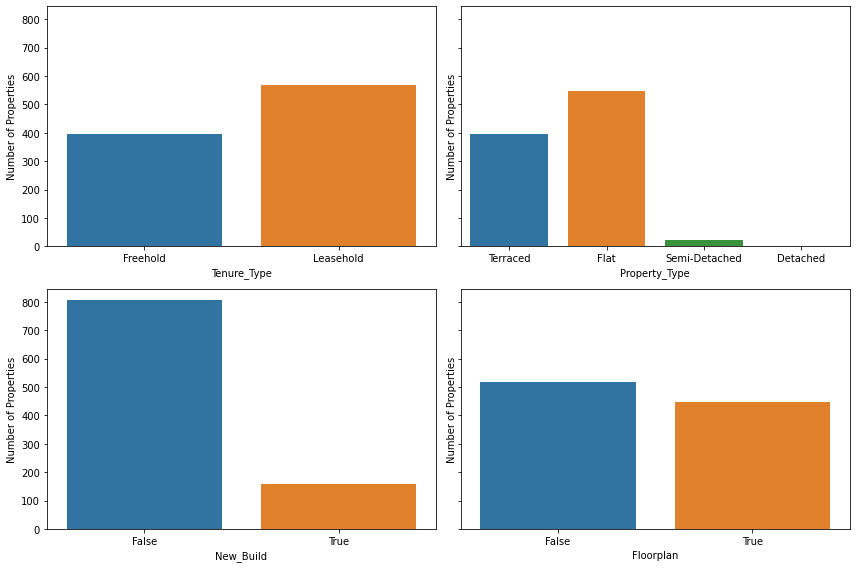

In [13]:
fig, axes = plt.subplots(2,2,figsize=(12,8), sharey=True)

for column, ax in zip(categorical_columns,axes.ravel()):
    sns.countplot(x=column,data=df.drop_duplicates(subset=['Address']),ax=ax)

    ax.set_ylabel('Number of Properties')



plt.tight_layout()

Renaming labels for some categories

In [14]:
df['New_Build'].replace({'False':'No','True':'Yes'},inplace=True)

df['Floorplan'].replace({'False':'No','True':'Yes'},inplace=True)

### Removing Unnecessary Columns

Analysing '0' bedroom properties to see if they are studios or if a dumping ground for properties with unknown number of bedrooms

In [15]:
df[df['Num_Bedrooms']==0]['URL'].iloc[5:]

859    https://www.rightmove.co.uk/house-prices/detai...
860    https://www.rightmove.co.uk/house-prices/detai...
861    https://www.rightmove.co.uk/house-prices/detai...
Name: URL, dtype: object

After looking through the URL links, the webpages were unavailable so I am unable to verify the data. As I am unsure if the data is correct and also as it only contains 8 training examples, I will remove 0 bedroom properties from the data.

In [16]:
df = df[df.Num_Bedrooms != 0]

In [17]:
df[df['Num_Bedrooms']==0]

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name,Year_Sold


Removing the unnecessary columns: 'Image_URL' & 'URL'. The analysis no longer has a use for the URL links of the property

In [18]:
df.drop(['Image_URL','URL'],axis=1,inplace=True)
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2006


### Handling Missing Values
Checking for any missing values. There seems to be missing values for 'Num_Bedrooms'

In [19]:
df.isnull().sum()

Price              0
Date_Sold          0
Tenure_Type        0
New_Build          0
Address            0
Property_Type      0
Num_Bedrooms     690
Floorplan          0
Latitude           0
Longitude          0
Post_Code          0
Road_Name          0
Year_Sold          0
dtype: int64

In [20]:
df.isnull().sum()*100/len(df)

Price             0.000000
Date_Sold         0.000000
Tenure_Type       0.000000
New_Build         0.000000
Address           0.000000
Property_Type     0.000000
Num_Bedrooms     30.396476
Floorplan         0.000000
Latitude          0.000000
Longitude         0.000000
Post_Code         0.000000
Road_Name         0.000000
Year_Sold         0.000000
dtype: float64

There are around 30% missing values for 'Num_Bedrooms' so it would usually be a good idea to disregard the column. Since, I believe number of bedrooms contain a large amount of information, I will remove the rows with number of bedrooms missing. I will try to impute the missing values in the future and compare if model performance improves.

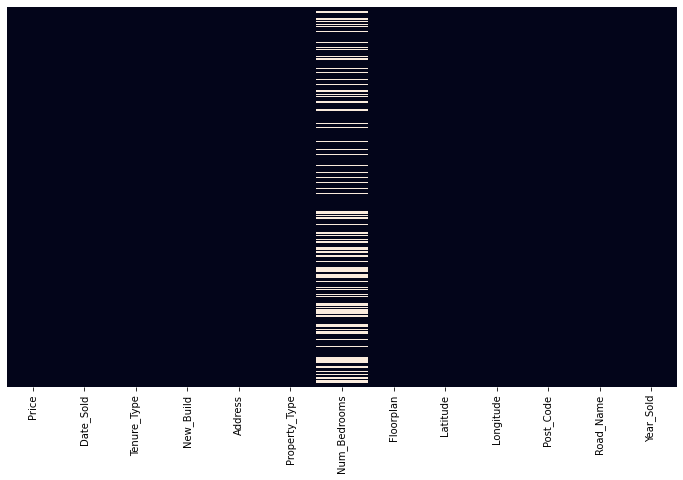

In [21]:
plt.figure(figsize=(12,7))
axis = sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

Text(0.5, 0, 'Type of property with missing number of bedrooms data')

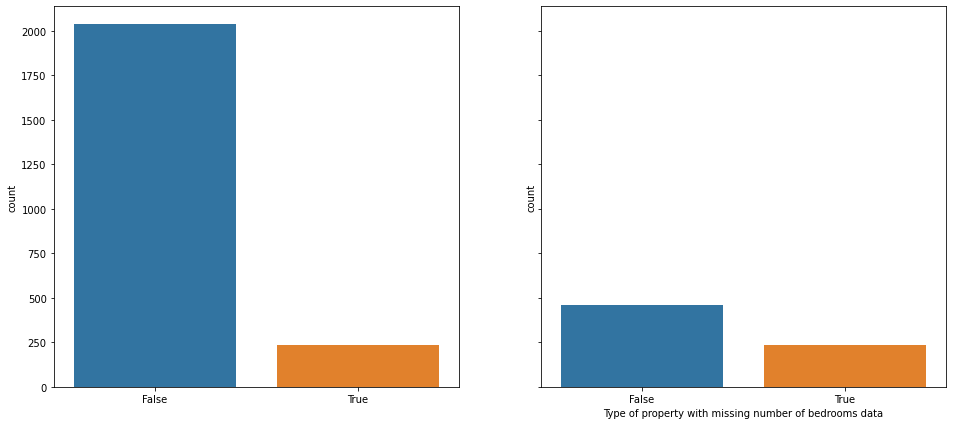

In [22]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(16,7),sharey=True)
sns.countplot(x='New_Build',data=df,ax=axis1)
axis1.set_xlabel(' ')

sns.countplot(x='New_Build',data=df[df['Num_Bedrooms'].isnull()],ax=axis2)
axis2.set_xlabel('Type of property with missing number of bedrooms data')

After further analysis of the data as seen above, a large proportion of missing property data are derived from new builds and so by deleting all rows of missing data will also result in deleting most new build training examples. I cannot infer the number of bedrooms for a given new build property based on its features since there are too few complete training examples. From my knowledge, I still believe that number of bedrooms in a property is a more indicative metric of price than if the property is a new build. Therefore, I will continue to drop all rows with missing number of bedrooms.

In [23]:
df.dropna(subset=['Num_Bedrooms'],inplace=True)

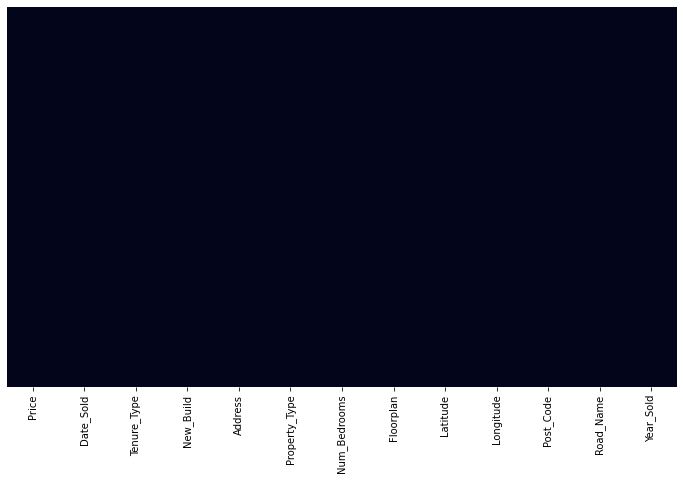

In [24]:
plt.figure(figsize=(12,7))
axis = sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

To try to improve the model's performance, I would impute the missing values of number of bedrooms using the mean price. However, house prices vary greatly depending year sold and therefore it would be too inaccurate to use the average price for all years. Furthermore, a large proportion of missing data are new build properties and there are too few complete examples to infer the rest of the data. In the future, I would impute the number of bedrooms based on mean price for a given year.

## Exploratory Data Analysis

Before I conduct exploratory data analysis using Matplotlib and Seaborn, I will first export the dataframe to analyse in Tableau and create a dashboard that allow users to interact with the data. The dashboard allows potential buyers and sellers to draw insight and make decisions regarding potentially buying or selling properties in the area.

I will also try to conduct the same analysis using Python's Matplotlib and Seaborn

In [25]:
df.to_csv('Property Data Tableau.csv',index=False)

Please visit the dashboard here: https://public.tableau.com/app/profile/danel.indiongco/viz/PropertyPricesinLeyton/Dashboard1

Continuing to visualise the data, we can see below that on average as the number of bedrooms in a house increases, the price also increases. There is an exception where a 1 bedroom house has a higher average price compared to 2 bedroom houses. This can be due to an increase in number of sales of 1 bedroom properties compared to 2 bedroom properties in more recent years where house prices are significantly greater.

<AxesSubplot:xlabel='Num_Bedrooms', ylabel='Price'>

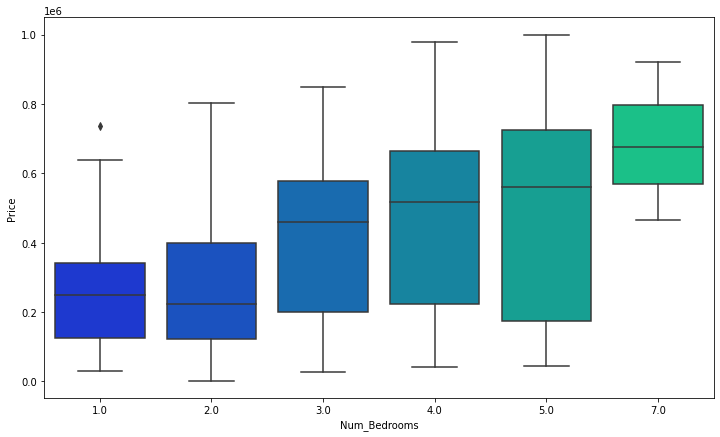

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Num_Bedrooms',y='Price',data=df,palette='winter')

Separating the different bedroom prices depending on the year. We can see that the more bedrooms a property has, the higher the mean price is for a given year as seen from the orange line. 

Another observation is that there are very few training examples for 7 bedroom properties.

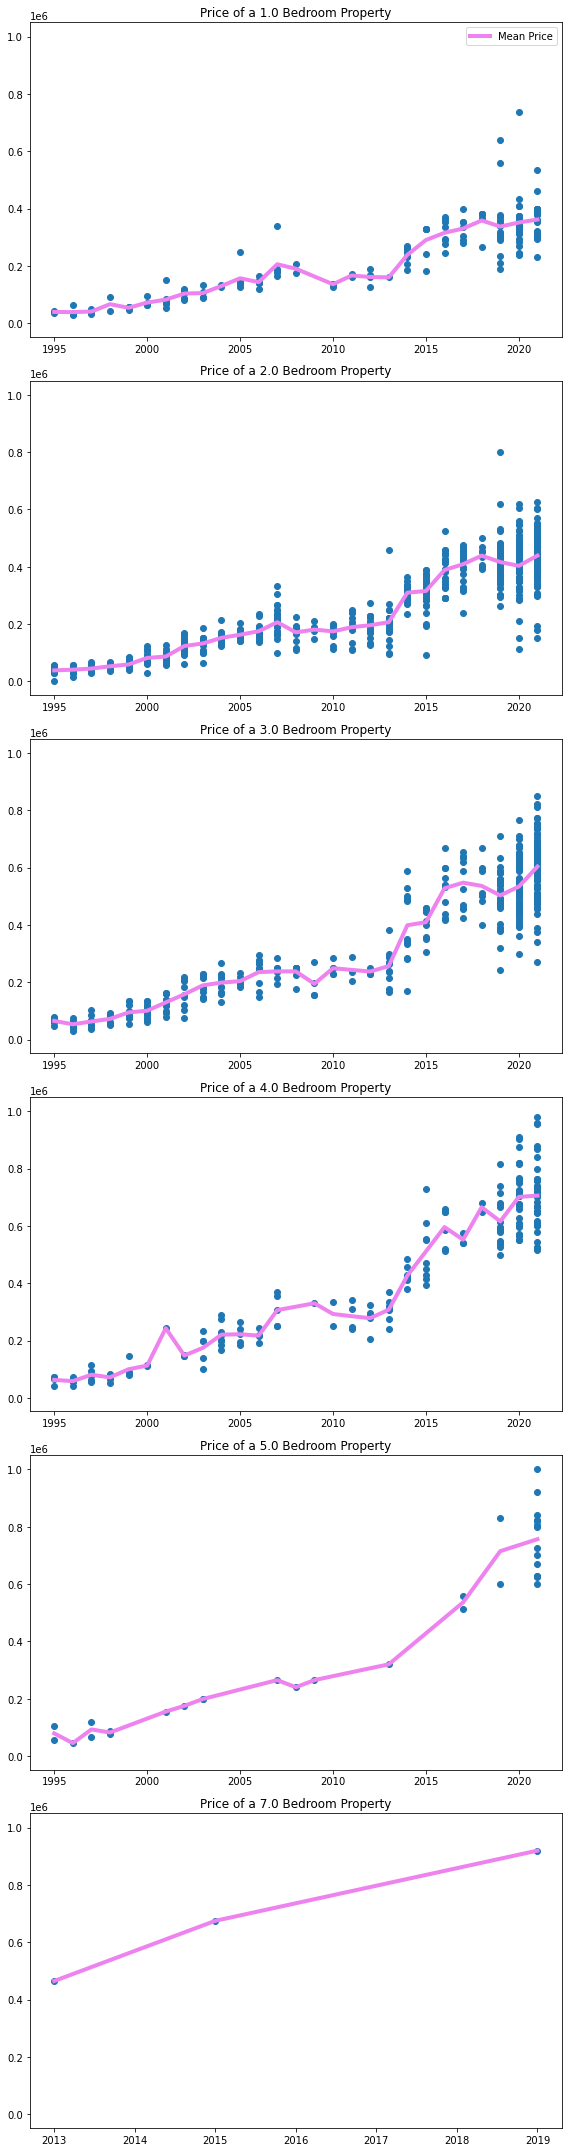

In [27]:
fig, axis = plt.subplots(6,1,figsize=(8, 30),sharey=True)

for idx, bedrooms in enumerate([1.0,2.0,3.0,4.0,5.0,7.0]):

    axis[idx].scatter('Year_Sold','Price',data=df[df['Num_Bedrooms']==bedrooms],label='')
    
    y_avg = df[df['Num_Bedrooms']==bedrooms].groupby(['Year_Sold']).mean()
    axis[idx].plot(y_avg.index,y_avg['Price'],color='violet',lw=4,label='Mean Price')

    axis[idx].set_title('Price of a {} Bedroom Property'.format(bedrooms))

axis[0].legend()

plt.tight_layout()

In [28]:
data = pd.concat([df[df['Year_Sold']==2015],df[df['Year_Sold']==2021]],axis=0)
data

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2015
94,182000,30 Jan 2015,Leasehold,False,"102a, Dawlish Road, London, Greater London E10...",Flat,1.0,True,51.56341,-0.00717,E10 6QW,Dawlish Road,2015
109,357500,14 Apr 2015,Leasehold,False,"293, Francis Road, London, Greater London E10 6NW",Flat,3.0,False,51.56614,-0.00907,E10 6NW,Francis Road,2015
151,370000,2 Oct 2015,Leasehold,False,"74, Brunswick Road, London, Greater London E10...",Flat,2.0,True,51.56667,-0.00804,E10 6RS,Brunswick Road,2015
158,427000,16 Dec 2015,Freehold,False,"50, Coopers Lane, London, Greater London E10 5DG",Terraced,4.0,True,51.56940,-0.01037,E10 5DG,Coopers Lane,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,375000,7 Jan 2021,Freehold,False,"122, Chesterfield Road, London, Greater London...",Terraced,3.0,True,51.57469,-0.00423,E10 6EN,Chesterfield Road,2021
942,300000,6 Jan 2021,Leasehold,False,"Flat 11, Bridge Court, Lea Bridge Road, London...",Flat,2.0,True,51.56975,-0.02580,E10 7JS,Bridge Court,2021
945,432000,5 Jan 2021,Leasehold,False,"111, Clementina Road, London, Greater London E...",Flat,2.0,False,51.56656,-0.02825,E10 7LU,Clementina Road,2021
948,728000,4 Jan 2021,Freehold,False,"72, Colchester Road, Leyton, London, Greater L...",Terraced,4.0,True,51.57274,-0.00561,E10 6HB,Colchester Road,2021


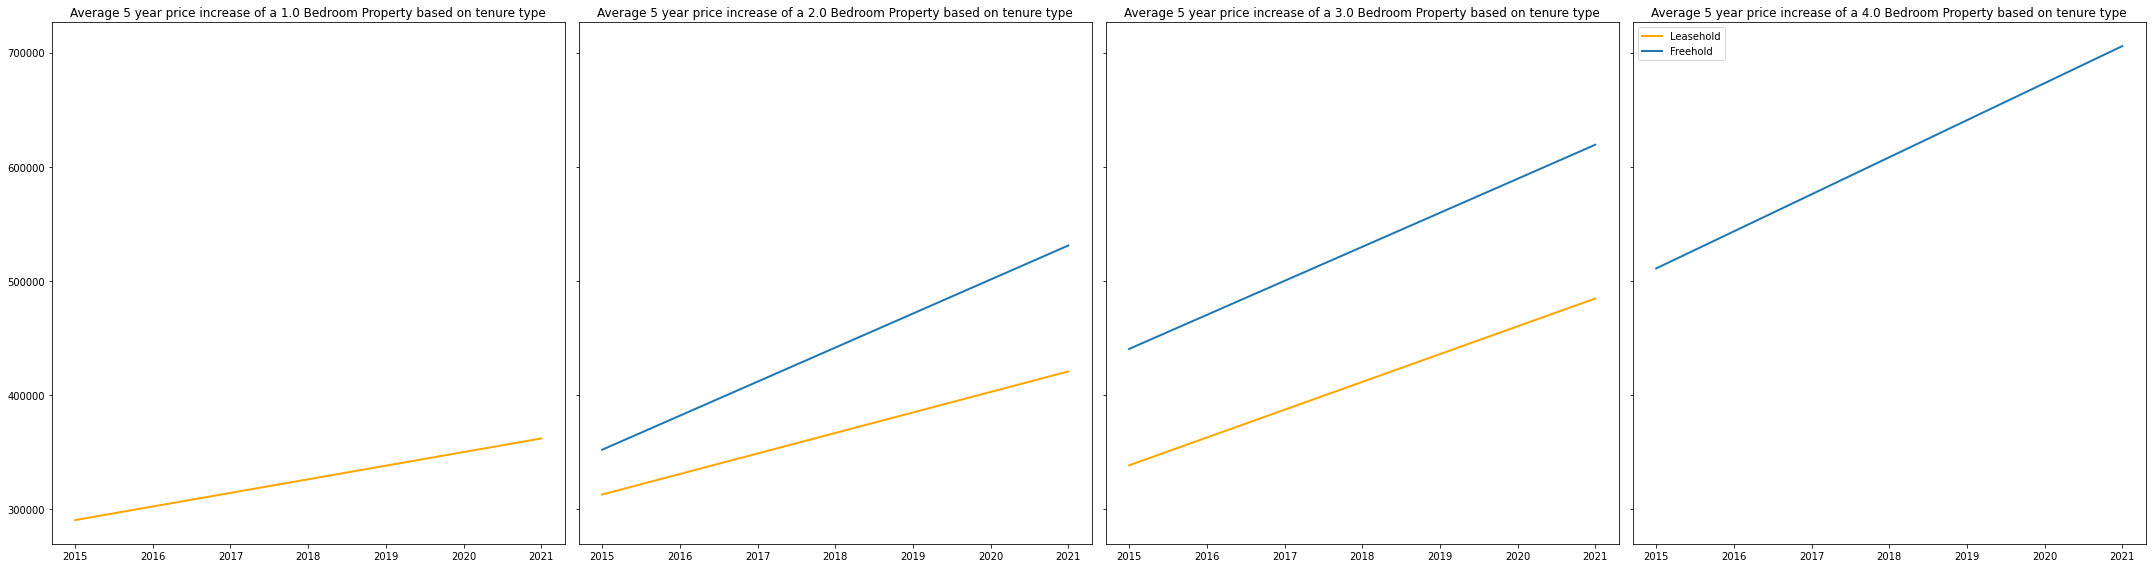

In [29]:
fig, axis = plt.subplots(1,4,figsize=(30, 8),sharey=True)

for idx, bedrooms in enumerate([1.0,2.0,3.0,4.0]):
    y_avg_leasehold = data[(data['Num_Bedrooms']==bedrooms)&(data['Tenure_Type']=='Leasehold')].groupby(['Year_Sold']).mean()
    axis[idx].plot(y_avg_leasehold.index,y_avg_leasehold['Price'],color='orange',lw=2,label='Leasehold')   
    
    y_avg_freehold = data[(data['Num_Bedrooms']==bedrooms)&(data['Tenure_Type']=='Freehold')].groupby(['Year_Sold']).mean()
    axis[idx].plot(y_avg_freehold.index,y_avg_freehold['Price'],lw=2,label='Freehold')

    axis[idx].set_title('Average 5 year price increase of a {} Bedroom Property based on tenure type'.format(bedrooms))

axis[3].legend()

plt.tight_layout()

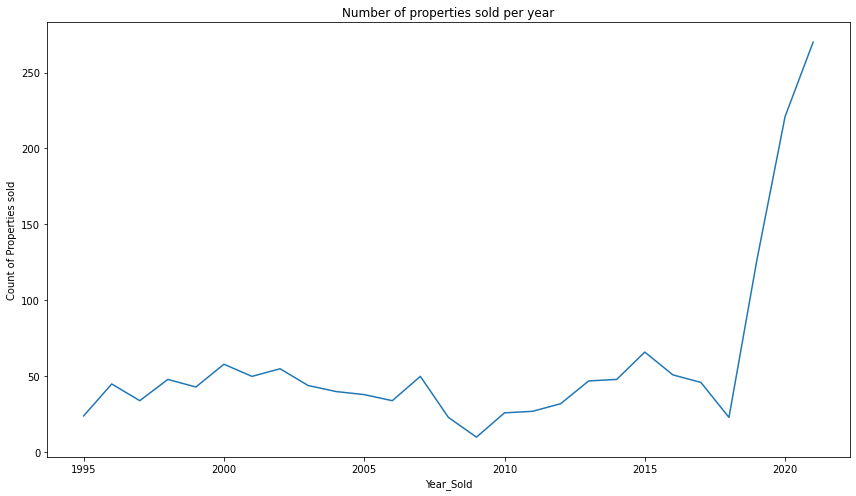

In [30]:
fig = plt.figure(figsize=(12,7))
fig = df.groupby('Year_Sold').count()['Price'].plot()
fig.set_ylabel('Count of Properties sold')
fig.set_title('Number of properties sold per year')

plt.tight_layout()

In [31]:
df_recent = df[df['Year_Sold']>2018]
df_recent.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2021
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2021
5,504000,29 Nov 2021,Leasehold,False,"118, Newport Road, London, Greater London E10 6PG",Flat,2.0,True,51.56547,-0.00145,E10 6PG,Newport Road,2021
8,714000,18 Nov 2021,Freehold,False,"3, Buckingham Road, London, Greater London E10...",Terraced,3.0,True,51.56015,-0.01063,E10 5NG,Buckingham Road,2021
13,540000,15 Nov 2021,Leasehold,False,"55, Francis Road, London, Greater London E10 6PN",Flat,3.0,False,51.56082,-0.00252,E10 6PN,Francis Road,2021


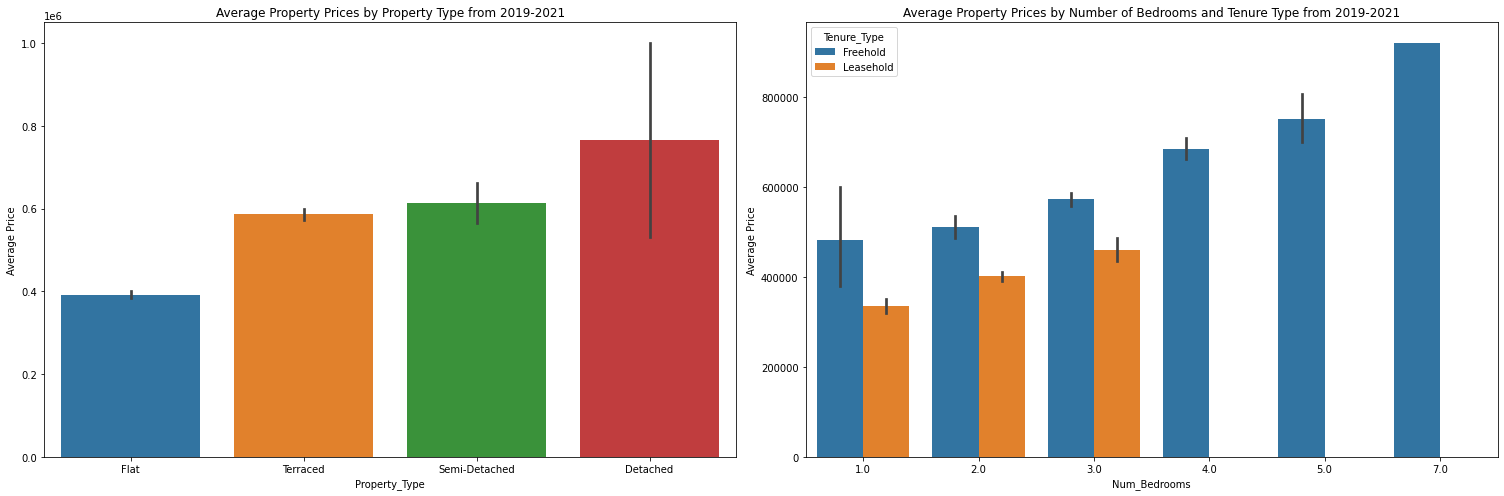

In [32]:
fig, axis = plt.subplots(1,2,figsize=(21,7))
sns.barplot(x='Property_Type',y='Price',data=df_recent,order=['Flat','Terraced','Semi-Detached','Detached'],ax=axis[0])
axis[0].set_ylabel('Average Price')
axis[0].set_title('Average Property Prices by Property Type from 2019-2021')

sns.barplot(x='Num_Bedrooms',y='Price',hue='Tenure_Type',data=df_recent,ax=axis[1])
axis[1].set_ylabel('Average Price')
axis[1].set_title('Average Property Prices by Number of Bedrooms and Tenure Type from 2019-2021')



plt.tight_layout()